# Problem Statement
### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


#### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


#### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

### Which variables are significant in predicting the demand for shared bikes.
#### How well those variables describe the bike demands
#### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



# Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the day dataset

In [700]:
import warnings
warnings.filterwarnings('ignore')

In [701]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [702]:
day = pd.read_csv("day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [703]:
day.shape

(730, 16)

In [704]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [705]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [706]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Step 2  Exploratary Data Analysis

## Indentify the null values

In [707]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# There is no null value in any column

In [708]:
#from the given data we can see that instant is an index column so we can drop it
##we can see column dteday and yr month are having same data so we can drop dteday
day.drop(['instant','dteday'],axis=1,inplace=True)

In [709]:
day.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [710]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [711]:
day.shape

(730, 14)

In [712]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
day.drop(['casual','registered'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [713]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [714]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

# Data Visualization
 Converting season, month, weathersit and weekday to categorical columns

In [715]:
# Season
day.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)

day.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [716]:
day.season.value_counts(normalize = True)

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

<AxesSubplot:>

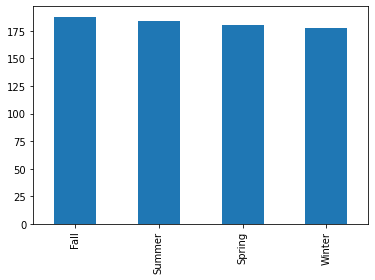

In [717]:

day.season.value_counts().plot.bar()

In [718]:
# Months
day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
day.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

<AxesSubplot:>

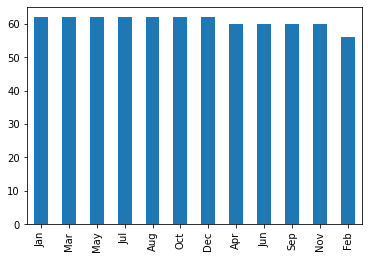

In [719]:
day.mnth.value_counts().plot.bar()

In [720]:
day.mnth.value_counts(normalize = True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [721]:
# Weekday
day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

In [722]:
day.weekday.value_counts(normalize = True)

Monday       0.143836
Tuesday      0.143836
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: weekday, dtype: float64

<AxesSubplot:>

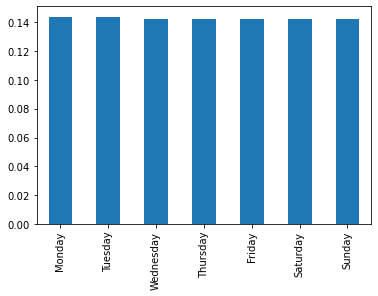

In [723]:
day.weekday.value_counts(normalize = True).plot.bar()

In [724]:
# Weathersit
day.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
day.weathersit.value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

<AxesSubplot:>

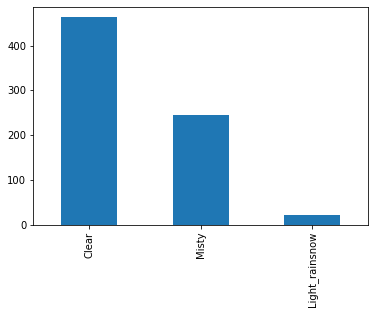

In [725]:
day.weathersit.value_counts().plot.bar()

In [726]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [727]:
day.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Sunday,0,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Monday,1,Misty,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [728]:
day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [729]:
day.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

# Analyzing  Categorical Columns

In [730]:
cat_var =['season','mnth','yr','holiday','weekday','workingday','weathersit']

<AxesSubplot:xlabel='season', ylabel='cnt'>

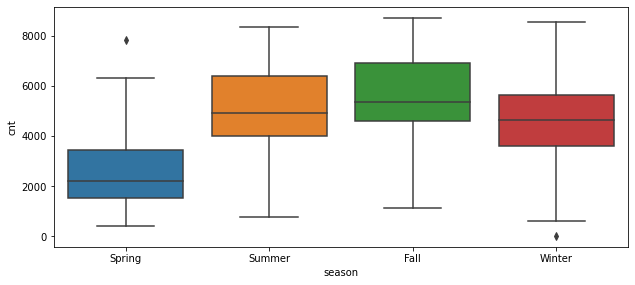

In [731]:
plt.figure(figsize=(35, 15))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

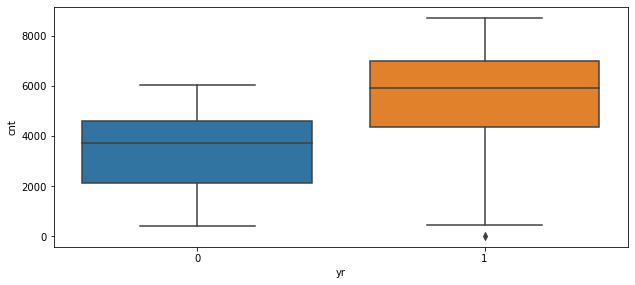

In [732]:
plt.figure(figsize=(35, 15))

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

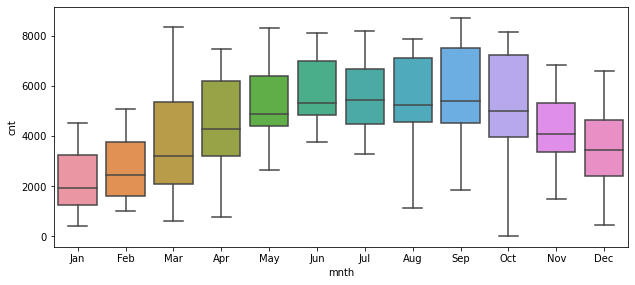

In [733]:
plt.figure(figsize=(35, 15))
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

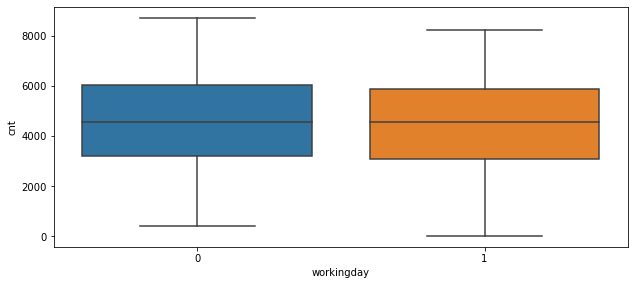

In [734]:
plt.figure(figsize=(35, 15))
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

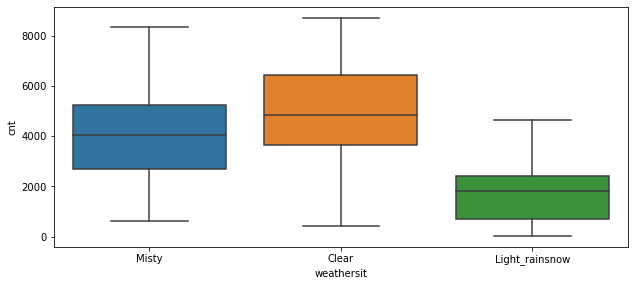

In [735]:
plt.figure(figsize=(35, 15))
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

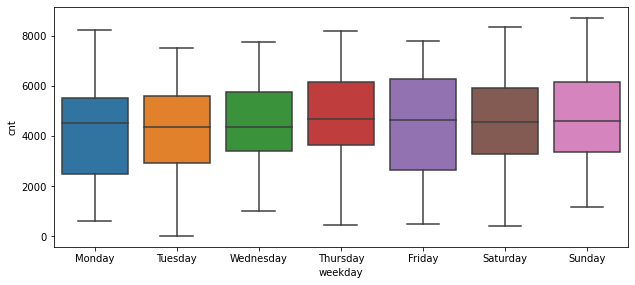

In [736]:
plt.figure(figsize=(35, 15))
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

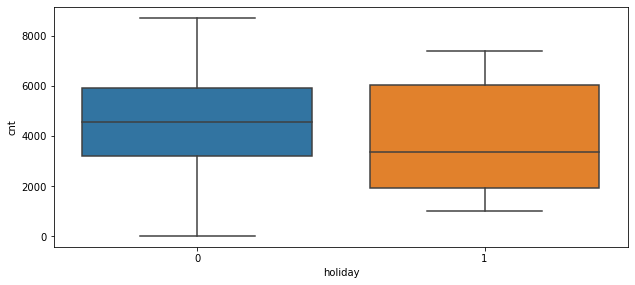

In [737]:
plt.figure(figsize=(35, 15))
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)


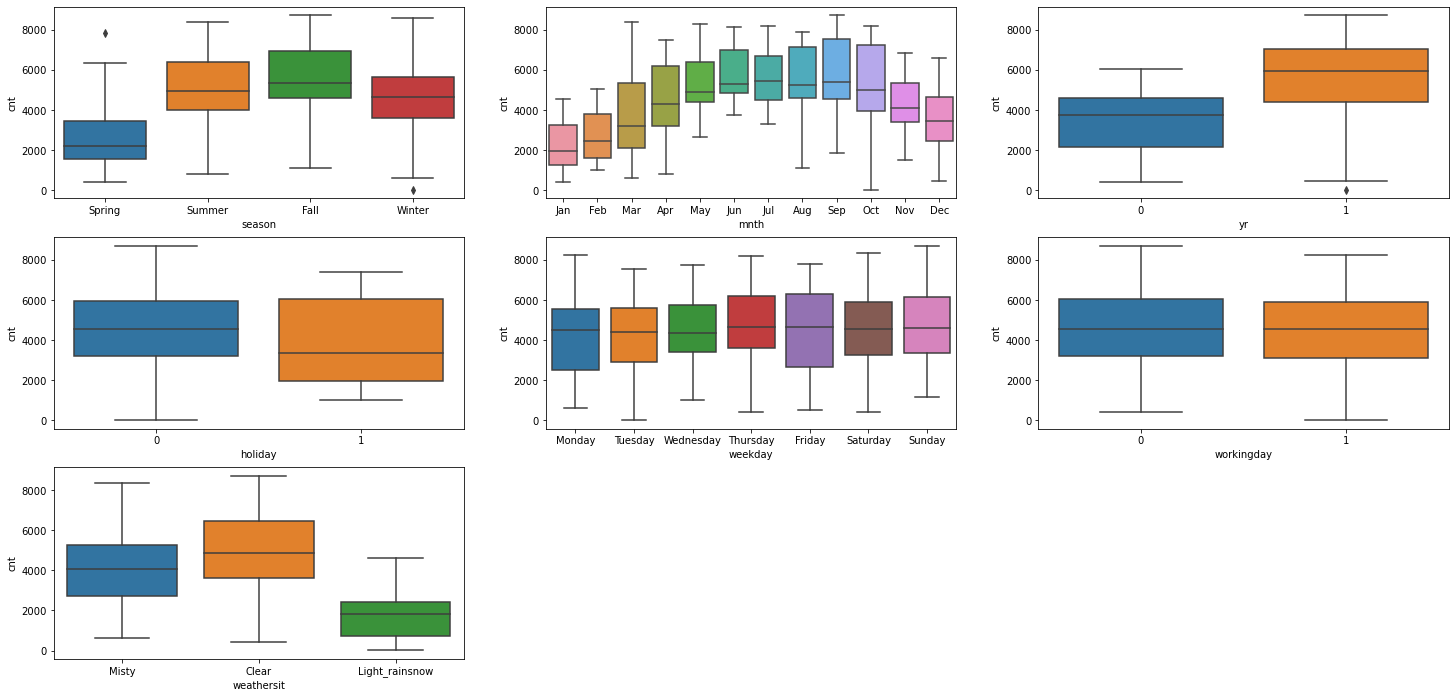

In [738]:
cat_var =['season','mnth','yr','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 12))
for i in range(0,len(cat_var)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = cat_var[i], y = 'cnt', data = day)
plt.show()

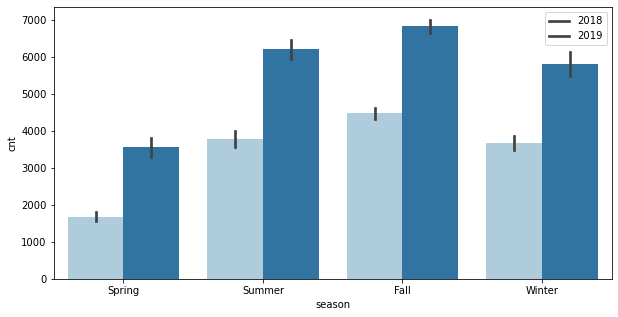

In [739]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'season', y = 'cnt', hue = 'yr', data = day, palette = 'Paired')  
plt.legend(labels=['2018', '2019'])
plt.show()

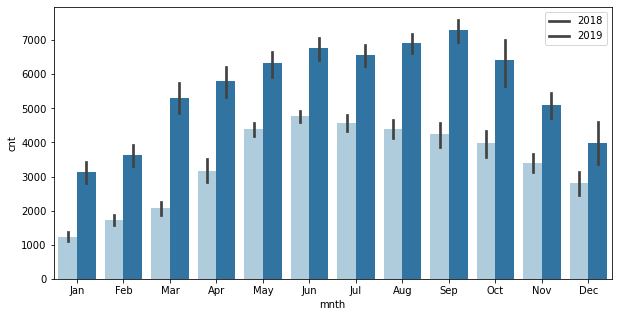

In [740]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'mnth', y = 'cnt', hue = 'yr', data = day, palette = 'Paired')  
plt.legend(labels=['2018', '2019'])
plt.show()

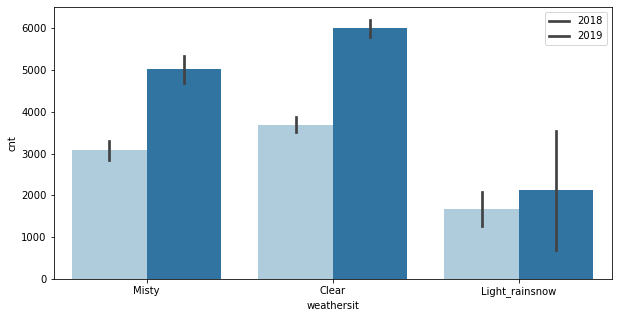

In [741]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = day, palette = 'Paired')  
plt.legend(labels=['2018', '2019'])
plt.show()

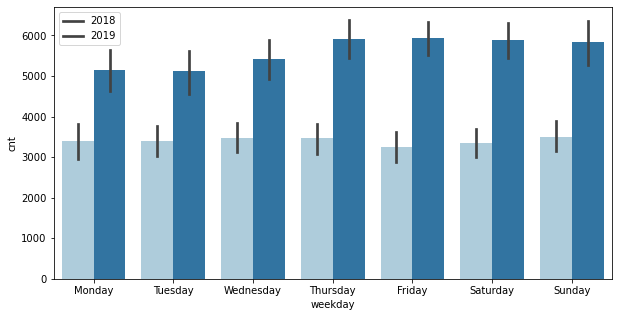

In [742]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'weekday', y = 'cnt', hue = 'yr', data = day, palette = 'Paired')  
plt.legend(labels=['2018', '2019'])
plt.show()

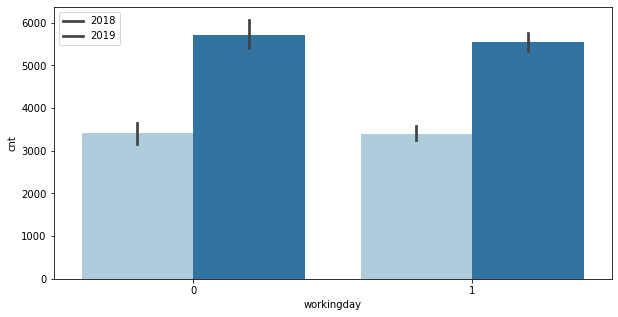

In [743]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'workingday', y = 'cnt', hue = 'yr', data = day, palette = 'Paired')  
plt.legend(labels=['2018', '2019'])
plt.show()

# Analysing Numerical variable

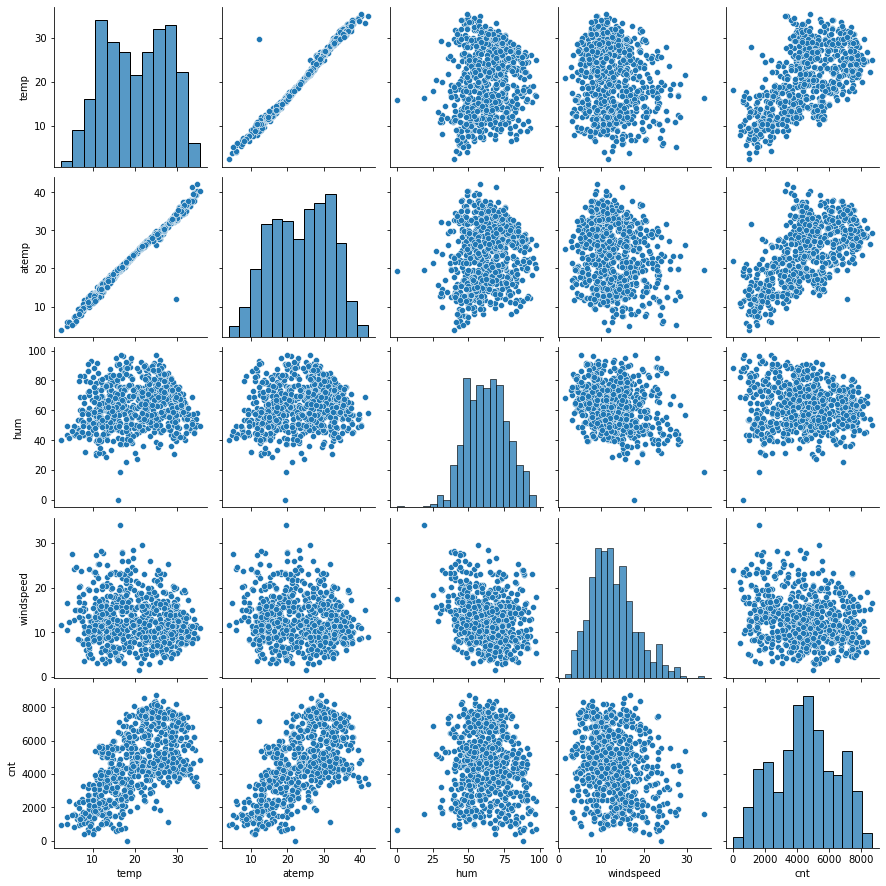

In [744]:
sns.pairplot(day, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

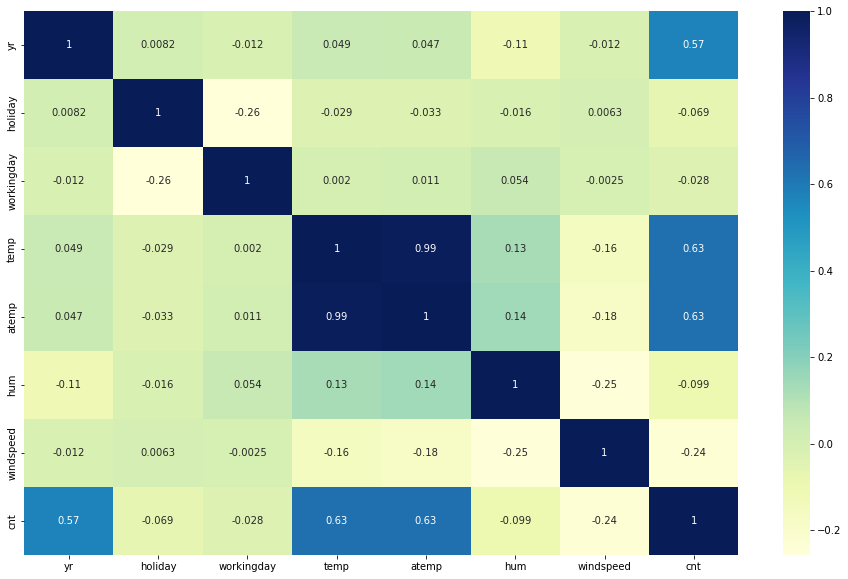

In [745]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inferences
It seems there is a high colinearity  between 'temp','atemp' and 'cnt' , we can see both variables has close values

# Step 3 Preparation of Data
Creating Dummy variables

In [746]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [747]:
day.shape


(730, 12)

In [748]:
months=pd.get_dummies(day.mnth,drop_first=True)
months.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [749]:
week_days=pd.get_dummies(day.weekday,drop_first=True)
week_days.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [750]:
weather_sit=pd.get_dummies(day.weathersit,drop_first=True)
weather_sit.head()

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [751]:
seasons=pd.get_dummies(day.season,drop_first=True)
seasons.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [752]:
# Merging the dataframe

day=pd.concat([months,week_days,weather_sit,seasons,day],axis=1)
day.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [753]:
# Drop the unwanted columns

day.drop(['mnth', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)
day.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [754]:
day.shape

(730, 30)

In [755]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    uint8  
 1   Dec             730 non-null    uint8  
 2   Feb             730 non-null    uint8  
 3   Jan             730 non-null    uint8  
 4   Jul             730 non-null    uint8  
 5   Jun             730 non-null    uint8  
 6   Mar             730 non-null    uint8  
 7   May             730 non-null    uint8  
 8   Nov             730 non-null    uint8  
 9   Oct             730 non-null    uint8  
 10  Sep             730 non-null    uint8  
 11  Monday          730 non-null    uint8  
 12  Saturday        730 non-null    uint8  
 13  Sunday          730 non-null    uint8  
 14  Thursday        730 non-null    uint8  
 15  Tuesday         730 non-null    uint8  
 16  Wednesday       730 non-null    uint8  
 17  Light_rainsnow  730 non-null    uin

In [756]:
day.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.246575,0.252055,0.243836,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.431313,0.434490,0.429689,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


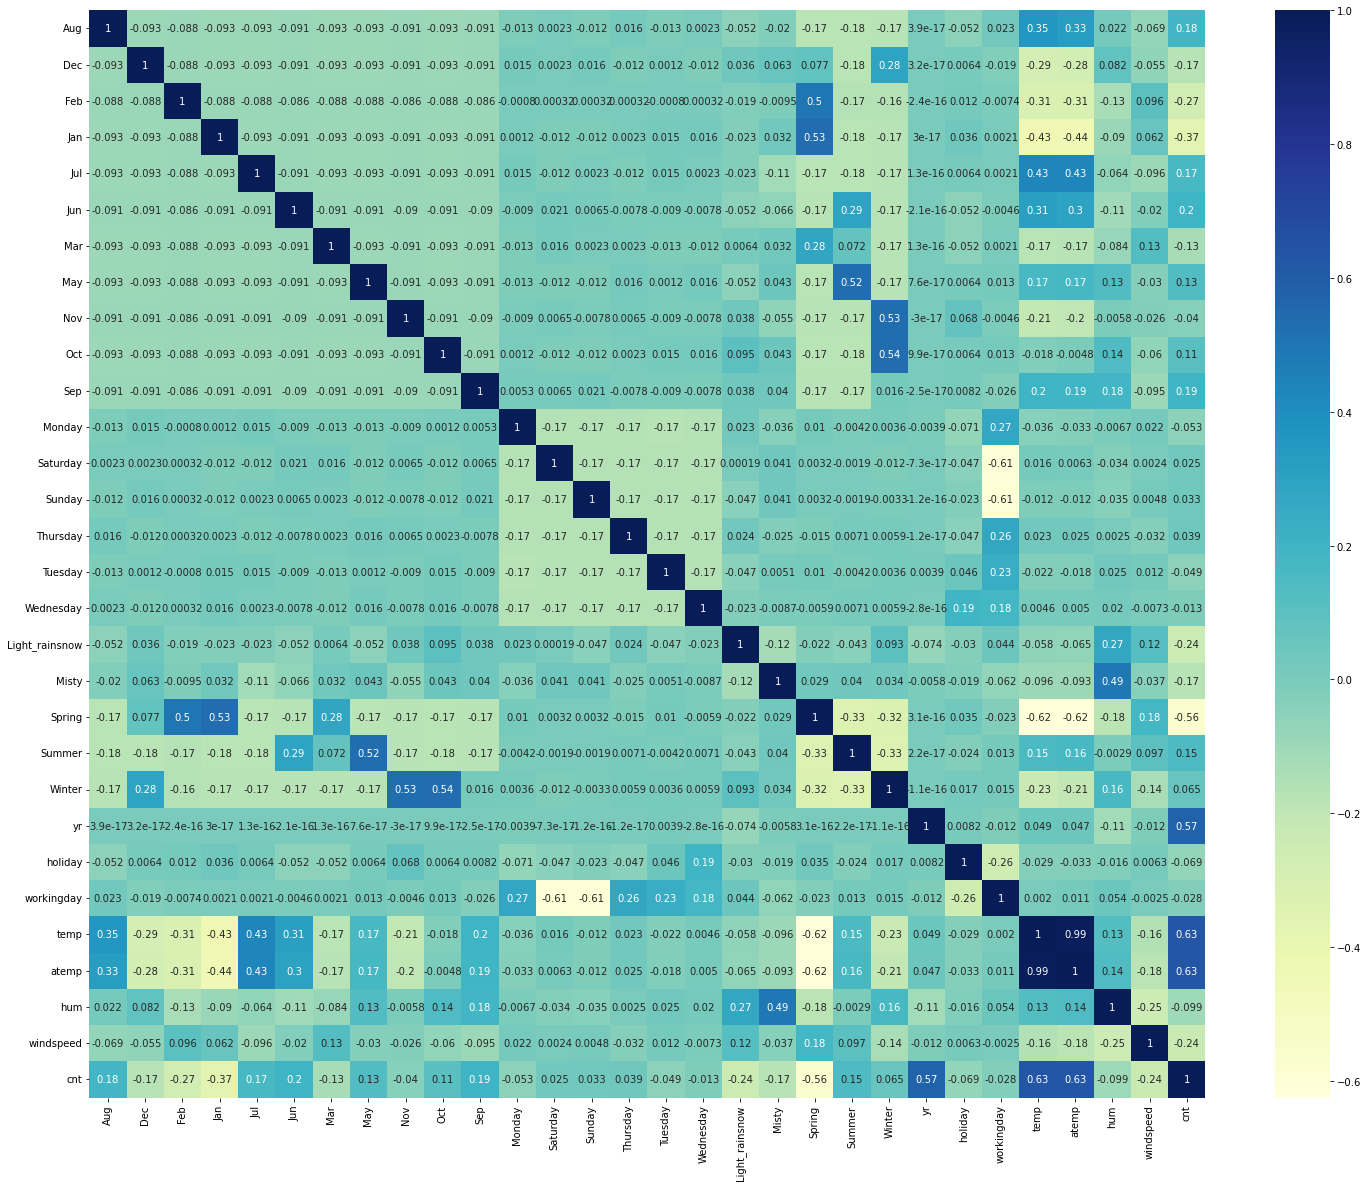

In [757]:
plt.figure(figsize=(25, 20))
sns.heatmap(day.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [758]:
day.drop(['atemp'],axis=1,inplace=True)
day.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [759]:
day.shape

(730, 29)

In [760]:
day.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light_rainsnow', 'Misty', 'Spring', 'Summer', 'Winter',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Inferences from the graph

1.We can see multi-colinearity between the variables from the generated graph
2.temp and atemp showing high multicolinearity amongest all the variable .
3.temp, atemp and year has a strong correlation with count.
4.year is aslo strongly corelated with the cnt variable
5.Spring is negatively correlated with count.
6.Misty weather and humidity are correlated.
7.Months and corresponding weathers are co-related as expecetd

# Step 4  Model Building

In [761]:
#spliting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [762]:
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [763]:
print(day_train.shape)

(510, 29)


In [764]:
print(day_test.shape)

(219, 29)


In [765]:
day_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902,0.507843,0.025490,0.711765,20.102429,63.112926,12.831318,4486.382353
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287,0.500429,0.157763,0.453386,7.431169,14.156632,5.291832,1952.158739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000


## Rescaling the Numerical variable

In [766]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [767]:
# Appliyng scaler on numerical varriables
num_vars = ['temp','hum','windspeed','cnt']


In [768]:
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [769]:
day_train[num_vars].head()

,temp,hum,windspeed,cnt
653,0.509887,0.575354,0.300794,0.864243
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973


In [770]:
day_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [771]:
day_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973


# Linear Model Building

In [772]:
# Building the model

y_train = day_train.pop('cnt')
X_train = day_train

In [773]:
X_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed
653,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475


In [774]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Recursive Feature Elimination
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [775]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [776]:
#We start with the 20 vraible and will use mixed approach to build the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=20)
rfe =rfe.fit(X_train, y_train)

In [777]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 2),
 ('Wednesday', False, 5),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [778]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Saturday', 'Sunday',
       'Light_rainsnow', 'Misty', 'Spring', 'Summer', 'Winter', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [779]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [780]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Manual Model Development using Statsmodel

In [781]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Model 1

In [782]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe) 

# Creating a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [783]:
X_train_lm1.head()

,const,Dec,Feb,Jan,Jul,May,Nov,Sep,Saturday,Sunday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475


In [784]:
lr1.params

const             0.393481
Dec              -0.049754
Feb              -0.037284
Jan              -0.064873
Jul              -0.054453
May               0.024826
Nov              -0.045419
Sep               0.072528
Saturday         -0.040698
Sunday           -0.034459
Light_rainsnow   -0.249797
Misty            -0.058757
Spring           -0.056828
Summer            0.027020
Winter            0.099869
yr                0.230957
holiday          -0.134705
workingday       -0.056967
temp              0.451665
hum              -0.159135
windspeed        -0.186871
dtype: float64

In [785]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          9.48e-186
Time:                        15:36:11   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3935      0.081      4.

## Check for the VIF values of the feature variables.


In [786]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,workingday,48.84
18,hum,38.65
17,temp,29.21
8,Sunday,9.80
7,Saturday,9.41
11,Spring,7.09
19,windspeed,5.47
13,Winter,4.92
12,Summer,4.30
2,Jan,2.55


variable sunday have high value of vif so we are drop this variable for next model

## Model 2

### Drop the Variable 'Sunday'

In [787]:

X_train_rfe = X_train_rfe.drop('Sunday', axis = 1)


In [788]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          8.77e-187
Time:                        15:36:13   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3585      0.038      9.

In [789]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,hum,32.83
16,temp,19.21
15,workingday,6.00
10,Spring,5.59
18,windspeed,4.87
12,Winter,4.14
11,Summer,3.42
2,Jan,2.39
9,Misty,2.38
13,yr,2.10


In model 2 having high value of p value of saturday so in next model we will drop it

## Model 3

### Dropping the variable 'Saturday'

In [790]:
X_train_rfe = X_train_rfe.drop('Saturday', axis = 1)

In [791]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          7.76e-188
Time:                        15:36:15   Log-Likelihood:                 519.52
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3552      0.038      9.

In [792]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,hum,32.51
15,temp,18.55
9,Spring,5.48
17,windspeed,4.86
11,Winter,4.10
14,workingday,3.70
10,Summer,3.37
2,Jan,2.38
8,Misty,2.37
12,yr,2.10


## Model 4

### Dropping the variable 'Summer'

In [793]:
X_train_rfe = X_train_rfe.drop('Summer', axis = 1)

In [794]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.10e-188
Time:                        15:36:17   Log-Likelihood:                 518.22
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     492   BIC:                            -924.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3863      0.032     11.

In [795]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,hum,27.79
14,temp,17.44
9,Spring,4.28
16,windspeed,4.14
13,workingday,3.66
10,Winter,3.17
2,Jan,2.38
8,Misty,2.33
11,yr,2.07
1,Feb,1.92


## Model 5

### Dropping the variable 'Workingday'

In [796]:
X_train_rfe = X_train_rfe.drop('workingday', axis = 1)

In [797]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.45e-188
Time:                        15:36:18   Log-Likelihood:                 515.91
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     493   BIC:                            -925.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3738      0.032     11.

In [798]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,hum,26.38
13,temp,17.35
9,Spring,4.28
15,windspeed,4.08
10,Winter,3.17
2,Jan,2.37
8,Misty,2.27
11,yr,2.07
1,Feb,1.92
5,Nov,1.84


## Model 6

### droping the variable 'hum'

In [799]:
X_train_rfe = X_train_rfe.drop('hum', axis = 1)

In [800]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          7.43e-186
Time:                        15:36:20   Log-Likelihood:                 506.73
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     494   BIC:                            -913.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2931      0.026     11.

In [801]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,5.08
14,windspeed,4.06
9,Spring,3.83
10,Winter,2.65
2,Jan,2.20
11,yr,2.07
1,Feb,1.88
5,Nov,1.81
0,Dec,1.55
8,Misty,1.55


## Model 7

### Drop the variable 'May'


In [802]:
X_train_rfe = X_train_rfe.drop('May', axis = 1)

In [803]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.00e-186
Time:                        15:36:21   Log-Likelihood:                 505.36
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     495   BIC:                            -917.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2999      0.026     11.

In [804]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,4.71
13,windspeed,4.06
8,Spring,3.76
9,Winter,2.58
2,Jan,2.20
10,yr,2.07
1,Feb,1.88
4,Nov,1.81
0,Dec,1.55
7,Misty,1.53


## Model 8

### Drop the variable 'Feb'

In [805]:
X_train_rfe = X_train_rfe.drop('Feb', axis = 1)

In [806]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.08e-186
Time:                        15:36:23   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2893      0.025     11.

In [807]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,4.67
12,windspeed,4.05
8,Winter,2.54
7,Spring,2.36
9,yr,2.06
3,Nov,1.80
1,Jan,1.65
6,Misty,1.53
0,Dec,1.46
2,Jul,1.36


# Model 9

In [808]:
X_train_rfe = X_train_rfe.drop('Nov', axis = 1)

In [809]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

# Print a summary of the linear regression model obtained
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.02e-186
Time:                        15:36:25   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.025     11.

In [810]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.63
11,windspeed,4.00
6,Spring,2.36
8,yr,2.06
1,Jan,1.64
7,Winter,1.64
5,Misty,1.53
2,Jul,1.36
0,Dec,1.29
3,Sep,1.20


# Model 10

In [811]:
X_train_rfe = X_train_rfe.drop('Spring', axis = 1)

In [812]:
# Add a constant
X_train_lm10 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr10 = sm.OLS(y_train, X_train_lm10).fit()

# Print a summary of the linear regression model obtained
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          3.68e-179
Time:                        15:36:30   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -935.6
Df Residuals:                     498   BIC:                            -884.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1837      0.021      8.

In [813]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.50
10,windspeed,3.25
7,yr,2.04
5,Misty,1.52
6,Winter,1.48
2,Jul,1.35
0,Dec,1.22
3,Sep,1.20
1,Jan,1.18
4,Light_rainsnow,1.08


In [814]:
X_train_rfe.head()

,Dec,Jan,Jul,Sep,Light_rainsnow,Misty,Winter,yr,holiday,temp,windspeed
653,0,0,0,0,0,0,1,1,0,0.509887,0.300794
576,0,0,1,0,0,0,0,1,0,0.815169,0.264686
426,0,0,0,0,0,1,0,1,0,0.442393,0.255342
728,1,0,0,0,0,0,0,1,0,0.245101,0.663106
482,0,0,0,0,0,1,0,1,0,0.395666,0.188475


# Model 11

In [815]:
X_train_rfe['Summer']=X_train['Summer']
X_train_rfe.head()

,Dec,Jan,Jul,Sep,Light_rainsnow,Misty,Winter,yr,holiday,temp,windspeed,Summer
653,0,0,0,0,0,0,1,1,0,0.509887,0.300794,0
576,0,0,1,0,0,0,0,1,0,0.815169,0.264686,0
426,0,0,0,0,0,1,0,1,0,0.442393,0.255342,0
728,1,0,0,0,0,0,0,1,0,0.245101,0.663106,0
482,0,0,0,0,0,1,0,1,0,0.395666,0.188475,1


In [816]:
X_train_lm11 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_lm11).fit()

# Print a summary of the linear regression model obtained
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          6.40e-186
Time:                        15:36:39   Log-Likelihood:                 498.62
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     497   BIC:                            -916.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1590      0.021      7.

In [817]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.14
10,windspeed,3.37
7,yr,2.04
11,Summer,1.82
6,Winter,1.66
5,Misty,1.54
2,Jul,1.52
3,Sep,1.30
0,Dec,1.23
1,Jan,1.22


In [818]:
X_train_rfe.columns

Index(['Dec', 'Jan', 'Jul', 'Sep', 'Light_rainsnow', 'Misty', 'Winter', 'yr',
       'holiday', 'temp', 'windspeed', 'Summer'],
      dtype='object')

# Model 12

In [819]:
X_train_rfe = X_train_rfe.drop('Dec', axis = 1)

In [820]:
X_train_lm12 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr12 = sm.OLS(y_train, X_train_lm12).fit()

# Print a summary of the linear regression model obtained
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.63e-186
Time:                        15:36:47   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1481      0.020      7.

In [821]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.13
9,windspeed,3.33
6,yr,2.04
10,Summer,1.82
4,Misty,1.53
1,Jul,1.52
5,Winter,1.51
2,Sep,1.29
0,Jan,1.22
3,Light_rainsnow,1.08


## Model 13 
### Drop Variable Summer again

In [822]:
X_train_rfe = X_train_rfe.drop('Summer', axis = 1)

In [823]:
X_train_lm13 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr13 = sm.OLS(y_train, X_train_lm13).fit()

# Print a summary of the linear regression model obtained
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          3.36e-179
Time:                        15:36:55   Log-Likelihood:                 477.07
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     499   BIC:                            -885.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1691      0.020      8.

In [824]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.48
9,windspeed,3.23
6,yr,2.04
4,Misty,1.52
1,Jul,1.35
5,Winter,1.31
2,Sep,1.20
0,Jan,1.17
3,Light_rainsnow,1.08
7,holiday,1.04


In [679]:
lr13.params

const             0.169062
Jan              -0.071975
Jul              -0.076125
Sep               0.061813
Light_rainsnow   -0.284681
Misty            -0.076534
Winter            0.086519
yr                0.232871
holiday          -0.105139
temp              0.555825
windspeed        -0.153868
dtype: float64

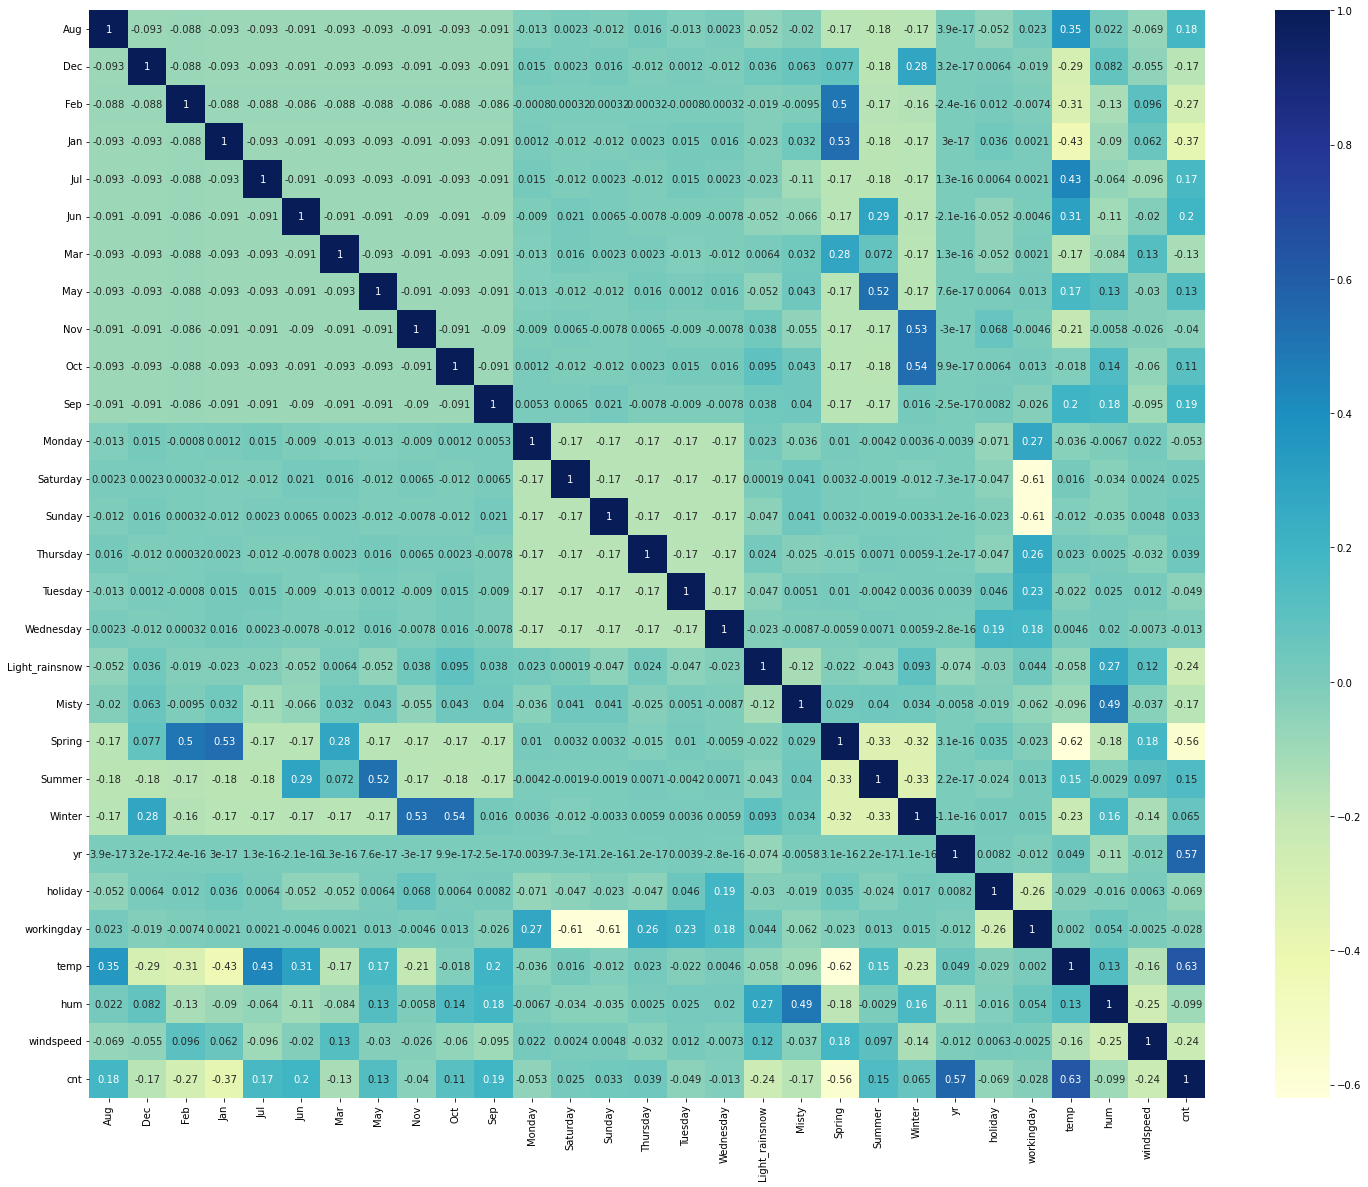

In [680]:
plt.figure(figsize=(25, 20))
sns.heatmap(day.corr(), cmap='YlGnBu', annot = True)
plt.show()

# Model 14

In [825]:
X_train_rfe = X_train_rfe.drop('Jan', axis = 1)

In [826]:
X_train_lm14 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr14 = sm.OLS(y_train, X_train_lm14).fit()

# Print a summary of the linear regression model obtained
print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          5.16e-177
Time:                        15:37:34   Log-Likelihood:                 469.06
No. Observations:                 510   AIC:                            -918.1
Df Residuals:                     500   BIC:                            -875.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1279      0.018      7.

In [827]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,4.31
8,windspeed,3.03
5,yr,2.01
3,Misty,1.48
0,Jul,1.35
4,Winter,1.29
1,Sep,1.20
2,Light_rainsnow,1.08
6,holiday,1.03


In [829]:
lr14.params

const             0.127942
Jul              -0.083502
Sep               0.060638
Light_rainsnow   -0.281875
Misty            -0.077651
Winter            0.101085
yr                0.231177
holiday          -0.107868
temp              0.608806
windspeed        -0.139630
dtype: float64

# Model 15

In [830]:
X_train_rfe['Summer']=X_train['Summer']
X_train_rfe.head()

,Jul,Sep,Light_rainsnow,Misty,Winter,yr,holiday,temp,windspeed,Summer
653,0,0,0,0,1,1,0,0.509887,0.300794,0
576,1,0,0,0,0,1,0,0.815169,0.264686,0
426,0,0,0,1,0,1,0,0.442393,0.255342,0
728,0,0,0,0,0,1,0,0.245101,0.663106,0
482,0,0,0,1,0,1,0,0.395666,0.188475,1


In [831]:
X_train_lm15 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr15 = sm.OLS(y_train, X_train_lm15).fit()

# Print a summary of the linear regression model obtained
print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.09e-186
Time:                        15:38:10   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1224      0.017      7.

In [832]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,5.06
8,windspeed,3.09
5,yr,2.01
9,Summer,1.75
0,Jul,1.52
3,Misty,1.49
4,Winter,1.46
1,Sep,1.29
2,Light_rainsnow,1.08
6,holiday,1.04


In [833]:
lr15.params

const             0.122378
Jul              -0.040647
Sep               0.091721
Light_rainsnow   -0.282819
Misty            -0.080797
Winter            0.126393
yr                0.232127
holiday          -0.100493
temp              0.570037
windspeed        -0.153992
Summer            0.078982
dtype: float64

In [836]:
X_train_rfe.head()

,Jul,Sep,Light_rainsnow,Misty,Winter,yr,holiday,temp,windspeed,Summer
653,0,0,0,0,1,1,0,0.509887,0.300794,0
576,1,0,0,0,0,1,0,0.815169,0.264686,0
426,0,0,0,1,0,1,0,0.442393,0.255342,0
728,0,0,0,0,0,1,0,0.245101,0.663106,0
482,0,0,0,1,0,1,0,0.395666,0.188475,1


## Out of all models Model 15 seems having good R2 square ,adjusted Rsquare and significant value of p of all variables 

# Residual Analysis for the train data

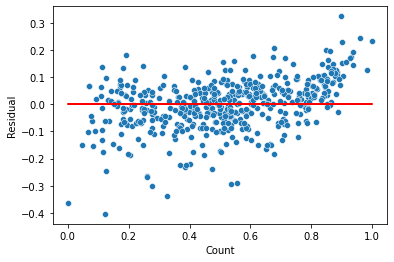

In [837]:
y_train_pred = lr15.predict(X_train_lm15)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

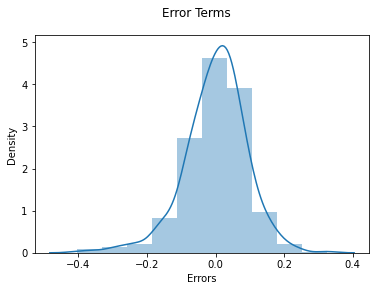

In [838]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

#  Making Predictions based on the final model

### Applying scaler.transform() to all numeric variables in test dataset.

In [839]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])


In [840]:
day_test[num_vars].head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [841]:
day_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


## Model Evaluation

## Spliting X_test and y_test


In [842]:
y_test = day_test.pop('cnt')
X_test = day_test

In [843]:
X_train_lm15 = X_train_lm15.drop(['const'], axis = 1)

In [844]:
column= X_train_lm15.columns

X_test=X_test[column]

# Adding constant variable to test dataframe
X_test_lm15 = sm.add_constant(X_test)

X_test_lm15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   Jul             219 non-null    uint8  
 2   Sep             219 non-null    uint8  
 3   Light_rainsnow  219 non-null    uint8  
 4   Misty           219 non-null    uint8  
 5   Winter          219 non-null    uint8  
 6   yr              219 non-null    int64  
 7   holiday         219 non-null    int64  
 8   temp            219 non-null    float64
 9   windspeed       219 non-null    float64
 10  Summer          219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [845]:
y_pred = lr15.predict(X_test_lm15)

Text(0, 0.5, 'y_pred')

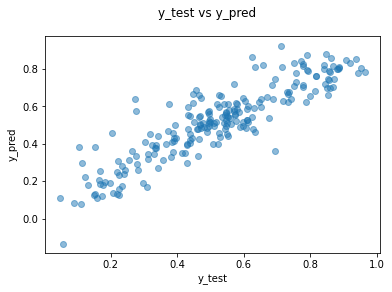

In [846]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

## R2 Value Calculation for day_test dataframe

In [847]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7931

## Adjusted R2 Value Calculation for day_test dataframe

In [848]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7832

## Calculating RMSE for the selected Model

In [849]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0991

## Calculating MAE for the selected Model

In [850]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0748

## Model Train & Test R2 Statsitics Comparison

 ### R2 Value     Train Dataset  = 0.832  Test Data Set =  0.7931

 ### Adjusted R2 Value   Train Dataset = 0.829     Test Data Set = 0.7832

### We can see that the equation of our best fitted line is:

### cnt = (-0.040647)*jul+(0.091721)*sep+ (-0.2828)*Light_rainsnow+(-0.080797)*Misty 

### +(0.126393)*Winter + (0.232127)*yr + (-0.100493)*holiday  + (0.570037)*temp+(-0.153992)*windspeed +(0.078982)*summer